In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
def standardize_data(data):
    n =  data.shape[0]
    mean = np.sum(data, axis=0) / n
    centered_data = data - mean
    std_dev = np.sqrt(np.sum(centered_data ** 2, axis=0) / (n - 1))
    standardized_data = centered_data / std_dev
    return standardized_data

X_standardized = standardize_data(X)
print(X_standardized)

[[-8.97673879e-01  1.01560199e+00 -1.33575163e+00 -1.31105215e+00]
 [-1.13920048e+00 -1.31538812e-01 -1.33575163e+00 -1.31105215e+00]
 [-1.38072709e+00  3.27317509e-01 -1.39239929e+00 -1.31105215e+00]
 [-1.50149039e+00  9.78893485e-02 -1.27910398e+00 -1.31105215e+00]
 [-1.01843718e+00  1.24503015e+00 -1.33575163e+00 -1.31105215e+00]
 [-5.35383973e-01  1.93331463e+00 -1.16580868e+00 -1.04866679e+00]
 [-1.50149039e+00  7.86173830e-01 -1.33575163e+00 -1.17985947e+00]
 [-1.01843718e+00  7.86173830e-01 -1.27910398e+00 -1.31105215e+00]
 [-1.74301699e+00 -3.60966973e-01 -1.33575163e+00 -1.31105215e+00]
 [-1.13920048e+00  9.78893485e-02 -1.27910398e+00 -1.44224482e+00]
 [-5.35383973e-01  1.47445831e+00 -1.27910398e+00 -1.31105215e+00]
 [-1.25996379e+00  7.86173830e-01 -1.22245633e+00 -1.31105215e+00]
 [-1.25996379e+00 -1.31538812e-01 -1.33575163e+00 -1.44224482e+00]
 [-1.86378030e+00 -1.31538812e-01 -1.50569459e+00 -1.44224482e+00]
 [-5.23307643e-02  2.16274279e+00 -1.44904694e+00 -1.31105215e

In [3]:
def find_covariance_matrix(data):
    num_samples = data.shape[0]
    covariance_matrix = np.dot(data.T, data) / (num_samples - 1)
    return covariance_matrix

covariance_matrix = find_covariance_matrix(X_standardized)
print(covariance_matrix)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [4]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


In [5]:
print(eigenvalues)

[2.91849782 0.91403047 0.14675688 0.02071484]


In [6]:

print(eigenvectors)

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
num_components = input("num_components")
print("dimension to which reduce the iris dataset is ",num_components)

In [60]:
num_components = 3

transformation_matrix = eigenvectors[:, :num_components]
print(transformation_matrix)

[[ 0.52106591 -0.37741762 -0.71956635]
 [-0.26934744 -0.92329566  0.24438178]
 [ 0.5804131  -0.02449161  0.14212637]
 [ 0.56485654 -0.06694199  0.63427274]]


In [61]:
X_pca = np.dot(X_standardized, transformation_matrix)
print(X_pca)

[[-2.25714118 -0.47842383 -0.12727962]
 [-2.07401302  0.67188269 -0.23382552]
 [-2.35633511  0.34076642  0.0440539 ]
 [-2.29170679  0.59539986  0.0909853 ]
 [-2.3818627  -0.64467566  0.01568565]
 [-2.06870061 -1.4842053   0.02687825]
 [-2.43586845 -0.04748512  0.3343503 ]
 [-2.22539189 -0.222403   -0.08839935]
 [-2.32684533  1.1116037   0.14459247]
 [-2.17703491  0.46744757 -0.25291827]
 [-2.15907699 -1.04020587 -0.267784  ]
 [-2.31836413 -0.132634    0.09344619]
 [-2.2110437   0.72624318 -0.23014025]
 [-2.62430902  0.95829635  0.18019242]
 [-2.19139921 -1.85384655 -0.47132203]
 [-2.25466121 -2.67731523  0.03042468]
 [-2.20021676 -1.47865573 -0.00532625]
 [-2.18303613 -0.48720613 -0.04406769]
 [-1.89223284 -1.40032757 -0.37309338]
 [-2.33554476 -1.1240836   0.13218763]
 [-1.90793125 -0.40749058 -0.41988594]
 [-2.19964383 -0.92103587  0.1593315 ]
 [-2.76508142 -0.4568133   0.33106998]
 [-1.81259716 -0.08527285  0.03437344]
 [-2.21972701 -0.13679618  0.11759957]
 [-1.9453293   0.62352971

In [65]:
# Convert PCA data to DataFrame and concatenate with target for visualization
pca_df = pd.DataFrame(data=X_pca , columns=['PC1', 'PC2','PC2'])
final_df = pd.concat([pca_df, pd.DataFrame(y, columns=['target'])], axis=1)

# Output the first few rows of the transformed data
print(final_df.head())



        PC1       PC2       PC2  target
0 -2.257141 -0.478424 -0.127280       0
1 -2.074013  0.671883 -0.233826       0
2 -2.356335  0.340766  0.044054       0
3 -2.291707  0.595400  0.090985       0
4 -2.381863 -0.644676  0.015686       0


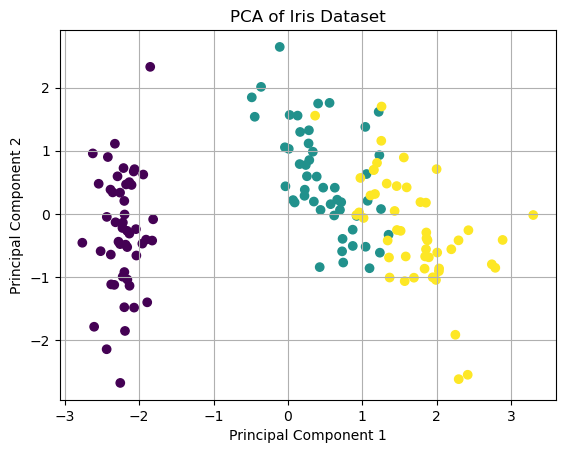

In [68]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.grid(True)
plt.show()


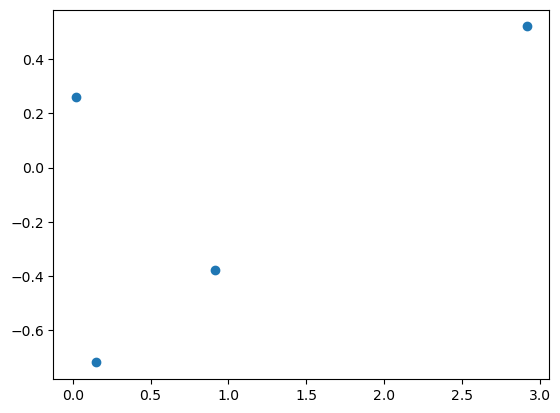

In [63]:
# eigenvectors
# eigenvalues
plt.scatter(eigenvalues, eigenvectors[0])
plt.show()

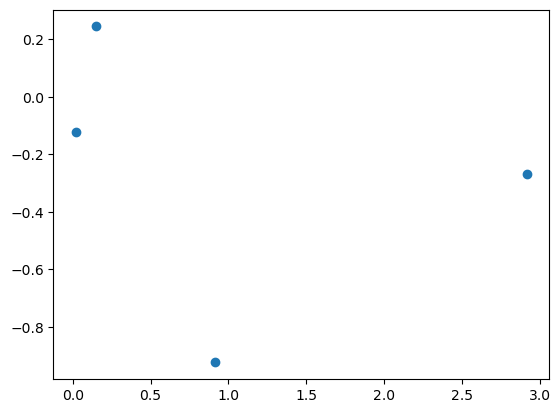

In [64]:
# eigenvectors
# eigenvalues
plt.scatter(eigenvalues, eigenvectors[1])
plt.show()